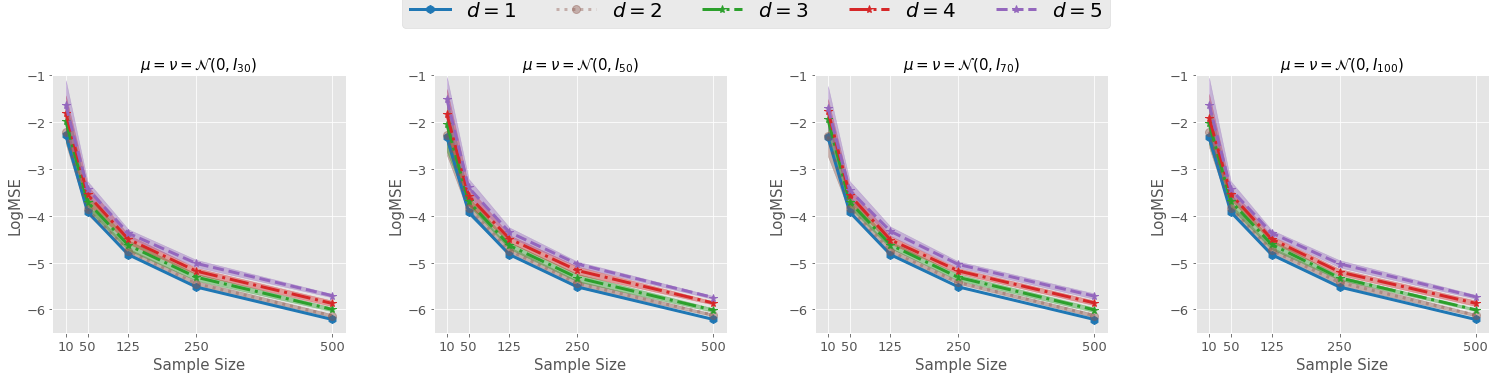

In [33]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def get_summary_hist(statistic,L_n_hist,L_d_hist,inner_num_trial=10,is_log=True):
    summary_hist = np.zeros([L_n_hist,L_d_hist, 2])
    if is_log:
        statistic = np.log(statistic)
    for i in range(L_n_hist):
        for j in range(L_d_hist):
            data = np.reshape(statistic[:,i,j], (inner_num_trial,))
            summary_hist[i,j,0] = np.mean(data)
            summary_hist[i,j,1] = 1.96 * np.sqrt(np.var(data))
    return summary_hist

n_hist = [10,50,125,250,500]
D_hist = [30,50,70,100]
d_hist = [1,2,3,4,5]
L_n_hist = np.size(n_hist)
L_d_hist = np.size(d_hist)
L_D_hist = np.size(D_hist)
inner_num_trial = 100

x = np.array([1,5,12.5,25,50])


fig, axes = plt.subplots(ncols=4, figsize=(21,5.5))
plt.style.use("ggplot")

for id_D in range(L_D_hist):
    D = D_hist[id_D]
    statistic = np.load('KPW_hist_D_'+str(D)+'_Gaussian.npy')
    summary_hist = get_summary_hist(statistic,L_n_hist,L_d_hist)

    if id_D == 0:
        axes[id_D].plot(x, summary_hist[:,0,0], label=r'$d=1$', 
                    linestyle = '-', marker = 'h', color='tab:blue',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,1,0], label=r'$d=2$', 
                    linestyle = ':', marker = 'o', color='tab:brown',ms=8,linewidth=3,alpha=0.4)
        axes[id_D].plot(x, summary_hist[:,2,0], label=r'$d=3$', 
                    linestyle = '-.', marker = '*', color='tab:green',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,3,0], label=r'$d=4$', 
                    linestyle = '-.', marker = '*', color='tab:red',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,4,0], label=r'$d=5$', 
                    linestyle = '--', marker = '*', color='tab:purple',ms=8,linewidth=3)
    else:
        axes[id_D].plot(x, summary_hist[:,0,0], #label=r'$d=1$', 
                    linestyle = '-', marker = 'h', color='tab:blue',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,1,0], #label=r'$d=2$', 
                    linestyle = ':', marker = 'o', color='tab:brown',ms=8,linewidth=3,alpha=0.4)
        axes[id_D].plot(x, summary_hist[:,2,0], #label=r'$d=3$', 
                    linestyle = '-.', marker = '*', color='tab:green',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,3,0], #label=r'$d=4$', 
                    linestyle = '-.', marker = '*', color='tab:red',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,4,0], #label=r'$d=5$', 
                    linestyle = '--', marker = '*', color='tab:purple',ms=8,linewidth=3)

    axes[id_D].fill_between(x, 
            summary_hist[:,0,0]+summary_hist[:,0,1], 
            summary_hist[:,0,0]-summary_hist[:,0,1],
                            color='tab:blue',alpha=0.4)
    axes[id_D].fill_between(x, 
            summary_hist[:,1,0]+summary_hist[:,1,1], 
            summary_hist[:,1,0]-summary_hist[:,1,1],
                            color='tab:brown',alpha=0.4)
    axes[id_D].fill_between(x, 
            summary_hist[:,2,0]+summary_hist[:,2,1],
            summary_hist[:,2,0]-summary_hist[:,2,1],
                            color='tab:green',alpha=0.4)
    axes[id_D].fill_between(x, 
            summary_hist[:,3,0]+summary_hist[:,3,1], 
            summary_hist[:,3,0]-summary_hist[:,3,1],
                            color='tab:red',alpha=0.4)
    axes[id_D].fill_between(x, 
            summary_hist[:,4,0]+summary_hist[:,4,1], 
            summary_hist[:,4,0]-summary_hist[:,4,1],
                            color='tab:purple',alpha=0.4)




    axes[id_D].set_xticks([1,5,12.5,25,50]) # values
    axes[id_D].set_xticklabels(['10','50','125','250','500']) # labels
    axes[id_D].set_yticks([-6,-5,-4,-3,-2,-1]) # values
    axes[id_D].grid(True)
    axes[id_D].tick_params(labelsize=13)
    axes[id_D].set_ylim([-6.5,-1])
    axes[id_D].set_xlabel('Sample Size', fontsize=15)
    axes[id_D].set_ylabel(r'LogMSE', fontsize=15)
    axes[id_D].set_title(r'$\mu=\nu=\mathcal{N}(0,I_{' + str(D) + '})$',fontsize=15)

plt.subplots_adjust(top=0.8, bottom=0.15,left=0.04, wspace=0.3, right=0.99)
fig.legend(loc="upper center",fontsize=20,ncol=5,bbox_to_anchor=(0.5,1))
plt.savefig('Exp_complexity_summary.pdf')


[ 0.10766513  0.03085098  0.28425827  1.87588978 13.04692745]
[ 0.12032475  0.03233294  0.30005074  1.92983871 13.06255424]
[ 0.12050719  0.0325263   0.29639704  1.92777562 13.01882768]
[ 0.11636636  0.03090801  0.29747438  1.92619801 13.06059372]


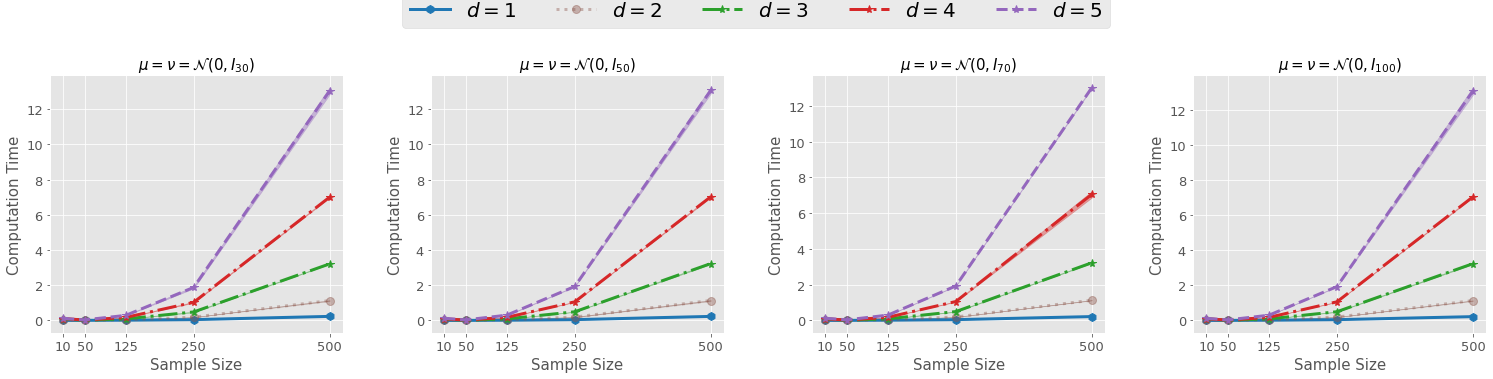

In [32]:
fig, axes = plt.subplots(ncols=4, figsize=(21,5.5))
x = np.array([1,5,12.5,25,50])
for id_D in range(L_D_hist):
    D = D_hist[id_D]
    statistic = np.load('Com_hist_D_'+str(D)+'_Gaussian.npy')
    summary_hist = get_summary_hist(statistic,L_n_hist,L_d_hist,is_log=False)
    
    print(summary_hist[:,4,0])

    if id_D == 0:
        axes[id_D].plot(x, summary_hist[:,0,0], label=r'$d=1$', 
                    linestyle = '-', marker = 'h', color='tab:blue',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,1,0], label=r'$d=2$', 
                    linestyle = ':', marker = 'o', color='tab:brown',ms=8,linewidth=3,alpha=0.4)
        axes[id_D].plot(x, summary_hist[:,2,0], label=r'$d=3$', 
                    linestyle = '-.', marker = '*', color='tab:green',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,3,0], label=r'$d=4$', 
                    linestyle = '-.', marker = '*', color='tab:red',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,4,0], label=r'$d=5$', 
                    linestyle = '--', marker = '*', color='tab:purple',ms=8,linewidth=3)
    else:
        axes[id_D].plot(x, summary_hist[:,0,0], #label=r'$d=1$', 
                    linestyle = '-', marker = 'h', color='tab:blue',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,1,0], #label=r'$d=2$', 
                    linestyle = ':', marker = 'o', color='tab:brown',ms=8,linewidth=3,alpha=0.4)
        axes[id_D].plot(x, summary_hist[:,2,0], #label=r'$d=3$', 
                    linestyle = '-.', marker = '*', color='tab:green',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,3,0], #label=r'$d=4$', 
                    linestyle = '-.', marker = '*', color='tab:red',ms=8,linewidth=3)
        axes[id_D].plot(x, summary_hist[:,4,0], #label=r'$d=5$', 
                    linestyle = '--', marker = '*', color='tab:purple',ms=8,linewidth=3)

    axes[id_D].fill_between(x, 
                    summary_hist[:,0,0]+summary_hist[:,0,1], 
                    summary_hist[:,0,0]-summary_hist[:,0,1],
                            color='tab:blue',alpha=0.4)
    axes[id_D].fill_between(x, 
                    summary_hist[:,1,0]+summary_hist[:,1,1],
                    summary_hist[:,1,0]-summary_hist[:,1,1],
                            color='tab:brown',alpha=0.4)
    axes[id_D].fill_between(x, 
                    summary_hist[:,2,0]+summary_hist[:,2,1], 
                    summary_hist[:,2,0]-summary_hist[:,2,1],
                            color='tab:green',alpha=0.4)
    axes[id_D].fill_between(x, 
                    summary_hist[:,3,0]+summary_hist[:,3,1], 
                    summary_hist[:,3,0]-summary_hist[:,3,1],
                            color='tab:red',alpha=0.4)
    axes[id_D].fill_between(x, 
                    summary_hist[:,4,0]+summary_hist[:,4,1], 
                    summary_hist[:,4,0]-summary_hist[:,4,1],
                            color='tab:purple',alpha=0.4)




    axes[id_D].set_xticks([1,5,12.5,25,50]) # values
    axes[id_D].set_xticklabels(['10','50','125','250','500']) # labels
    #axes[id_D].set_yticks([-6,-5,-4,-3,-2,-1]) # values
    axes[id_D].grid(True)
    axes[id_D].tick_params(labelsize=13)
    axes[id_D].set_xlabel('Sample Size', fontsize=15)
    axes[id_D].set_ylabel(r'Computation Time', fontsize=15)
    axes[id_D].set_title(r'$\mu=\nu=\mathcal{N}(0,I_{' + str(D) + '})$',fontsize=15)

plt.subplots_adjust(top=0.8, bottom=0.15,left=0.04, wspace=0.3, right=0.99)
fig.legend(loc="upper center",fontsize=20,ncol=5,bbox_to_anchor=(0.5,1))
plt.savefig('Exp_com_complexity_summary.pdf')